# Wer hat sich einen Bonus verdient?

## Datensatz importieren

In [122]:
import pandas as pd

dataset = pd.read_csv('predict_bonus.csv', sep=';')

## Aufteilung in Features and Labels

In [123]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [124]:
print(X)

[['erfuellt' 'erfuellt' 'uebertroffen' 'uebertroffen' 'erfuellt'
  'erfuellt' 'erfuellt' 5.0 5.5 5.0 4.75 5.5 5.0 5.5 6.0 5.75]
 ['erfuellt' 'erfuellt' 'erfuellt' 'erfuellt' 'erfuellt' 'erfuellt'
  'uebertroffen' 4.5 5.5 5.5 5.0 5.5 5.5 6.0 5.5 6.0]
 ['erfuellt' 'nicht erfuellt' 'uebertroffen' 'erfuellt' 'knapp erfuellt'
  'erfuellt' 'knapp erfuellt' nan 4.5 3.5 4.5 5.0 4.5 4.5 4.5 5.5]
 ['erfuellt' 'erfuellt' 'nicht erfuellt' 'erfuellt' 'knapp erfuellt'
  'erfuellt' 'erfuellt' 5.0 5.0 5.0 4.5 4.0 4.5 5.0 5.5 5.0]
 ['erfuellt' 'uebertroffen' 'knapp erfuellt' 'erfuellt' 'knapp erfuellt'
  'uebertroffen' 'erfuellt' 5.0 4.0 4.5 5.0 4.5 5.0 4.5 6.0 4.5]
 ['erfuellt' 'uebertroffen' 'erfuellt' 'erfuellt' 'erfuellt'
  'uebertroffen' 'erfuellt' 5.0 5.0 5.0 5.0 6.0 5.5 5.0 5.5 5.25]
 ['erfuellt' 'nicht erfuellt' 'erfuellt' 'knapp erfuellt'
  'knapp erfuellt' 'erfuellt' 'erfuellt' 3.0 4.5 4.5 5.0 5.5 4.0 4.0 4.5
  5.25]
 ['erfuellt' 'nicht erfuellt' 'erfuellt' 'knapp erfuellt'
  'knapp erfuellt'

In [125]:
print(y)

[1.  1.  0.  1.  0.5 0.5 0.  0.5]


## Umgang mit kategorialen Daten (Bildungsziele)

In [126]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, FunctionTransformer
from sklearn.pipeline import make_pipeline

categories = ['nicht erfuellt', 'knapp erfuellt', 'erfuellt', 'uebertroffen']
all_category_columns = [categories] * 7

ord_pipe = make_pipeline(
    OrdinalEncoder(categories=all_category_columns),
    FunctionTransformer(lambda X: X + 3)
)

ct = ColumnTransformer(
    transformers=[
        ('ord', ord_pipe, list(range(7)))
    ],
    remainder='passthrough'
)

X = ct.fit_transform(X)

In [127]:
print('Matrix of features: \n' + str(X))

Matrix of features: 
[[5.0 5.0 6.0 6.0 5.0 5.0 5.0 5.0 5.5 5.0 4.75 5.5 5.0 5.5 6.0 5.75]
 [5.0 5.0 5.0 5.0 5.0 5.0 6.0 4.5 5.5 5.5 5.0 5.5 5.5 6.0 5.5 6.0]
 [5.0 3.0 6.0 5.0 4.0 5.0 4.0 nan 4.5 3.5 4.5 5.0 4.5 4.5 4.5 5.5]
 [5.0 5.0 3.0 5.0 4.0 5.0 5.0 5.0 5.0 5.0 4.5 4.0 4.5 5.0 5.5 5.0]
 [5.0 6.0 4.0 5.0 4.0 6.0 5.0 5.0 4.0 4.5 5.0 4.5 5.0 4.5 6.0 4.5]
 [5.0 6.0 5.0 5.0 5.0 6.0 5.0 5.0 5.0 5.0 5.0 6.0 5.5 5.0 5.5 5.25]
 [5.0 3.0 5.0 4.0 4.0 5.0 5.0 3.0 4.5 4.5 5.0 5.5 4.0 4.0 4.5 5.25]
 [5.0 3.0 5.0 4.0 4.0 5.0 5.0 4.5 3.5 5.0 4.5 4.5 4.5 4.0 4.0 4.75]]


## Fehlende Daten

In [128]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, :])
X[:, :] = np.round(imputer.transform(X[:, :]), 2)

In [129]:
print(X)

[[5.0 5.0 6.0 6.0 5.0 5.0 5.0 5.0 5.5 5.0 4.75 5.5 5.0 5.5 6.0 5.75]
 [5.0 5.0 5.0 5.0 5.0 5.0 6.0 4.5 5.5 5.5 5.0 5.5 5.5 6.0 5.5 6.0]
 [5.0 3.0 6.0 5.0 4.0 5.0 4.0 4.57 4.5 3.5 4.5 5.0 4.5 4.5 4.5 5.5]
 [5.0 5.0 3.0 5.0 4.0 5.0 5.0 5.0 5.0 5.0 4.5 4.0 4.5 5.0 5.5 5.0]
 [5.0 6.0 4.0 5.0 4.0 6.0 5.0 5.0 4.0 4.5 5.0 4.5 5.0 4.5 6.0 4.5]
 [5.0 6.0 5.0 5.0 5.0 6.0 5.0 5.0 5.0 5.0 5.0 6.0 5.5 5.0 5.5 5.25]
 [5.0 3.0 5.0 4.0 4.0 5.0 5.0 3.0 4.5 4.5 5.0 5.5 4.0 4.0 4.5 5.25]
 [5.0 3.0 5.0 4.0 4.0 5.0 5.0 4.5 3.5 5.0 4.5 4.5 4.5 4.0 4.0 4.75]]


## Aufteilung in Trainings- und Testset

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [131]:
print(X_train)

[[5.0 3.0 5.0 4.0 4.0 5.0 5.0 3.0 4.5 4.5 5.0 5.5 4.0 4.0 4.5 5.25]
 [5.0 5.0 6.0 6.0 5.0 5.0 5.0 5.0 5.5 5.0 4.75 5.5 5.0 5.5 6.0 5.75]
 [5.0 6.0 4.0 5.0 4.0 6.0 5.0 5.0 4.0 4.5 5.0 4.5 5.0 4.5 6.0 4.5]
 [5.0 5.0 3.0 5.0 4.0 5.0 5.0 5.0 5.0 5.0 4.5 4.0 4.5 5.0 5.5 5.0]
 [5.0 6.0 5.0 5.0 5.0 6.0 5.0 5.0 5.0 5.0 5.0 6.0 5.5 5.0 5.5 5.25]]


In [132]:
print(X_test)

[[5.0 3.0 5.0 4.0 4.0 5.0 5.0 4.5 3.5 5.0 4.5 4.5 4.5 4.0 4.0 4.75]
 [5.0 3.0 6.0 5.0 4.0 5.0 4.0 4.57 4.5 3.5 4.5 5.0 4.5 4.5 4.5 5.5]
 [5.0 5.0 5.0 5.0 5.0 5.0 6.0 4.5 5.5 5.5 5.0 5.5 5.5 6.0 5.5 6.0]]


In [133]:
print(y_train)

[0.  1.  0.5 1.  0.5]


In [134]:
print(y_test)

[0.5 0.  1. ]


## Feature Scaling

In [135]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])

In [136]:
import numpy as np

X_train = X_train.astype(np.float64)
X_test  = X_test .astype(np.float64)

np.set_printoptions(precision=2, suppress=True)

print(X_train)


[[ 0.   -1.83  0.39 -1.58 -0.82 -0.82  0.   -2.   -0.59 -1.22  0.75  0.54
  -1.57 -1.57 -1.83  0.25]
 [ 0.    0.    1.37  1.58  1.22 -0.82  0.    0.5   1.37  0.82 -0.5   0.54
   0.39  1.37  0.91  1.48]
 [ 0.    0.91 -0.59  0.   -0.82  1.22  0.    0.5  -1.57 -1.22  0.75 -0.82
   0.39 -0.59  0.91 -1.6 ]
 [ 0.    0.   -1.57  0.   -0.82 -0.82  0.    0.5   0.39  0.82 -1.75 -1.5
  -0.59  0.39  0.   -0.37]
 [ 0.    0.91  0.39  0.    1.22  1.22  0.    0.5   0.39  0.82  0.75  1.22
   1.37  0.39  0.    0.25]]


In [137]:
print(X_test)

[[ 0.   -1.83  0.39 -1.58 -0.82 -0.82  0.   -0.12 -2.55  0.82 -1.75 -0.82
  -0.59 -1.57 -2.74 -0.98]
 [ 0.   -1.83  1.37  0.   -0.82 -0.82 -1.   -0.04 -0.59 -5.31 -1.75 -0.14
  -0.59 -0.59 -1.83  0.86]
 [ 0.    0.    0.39  0.    1.22 -0.82  1.   -0.12  1.37  2.86  0.75  0.54
   1.37  2.35  0.    2.09]]


## Multiple Linear Regression

### Training

In [138]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Prediction

In [139]:
y_pred = regressor.predict(X_test)


### Print

In [140]:
import numpy as np
print(
    np.concatenate(
        (y_pred.reshape(len(y_pred), 1),
         y_test.reshape(len(y_test ), 1)),
        axis=1
    )
)

[[0.31 0.5 ]
 [0.38 0.  ]
 [0.84 1.  ]]


# Plotting

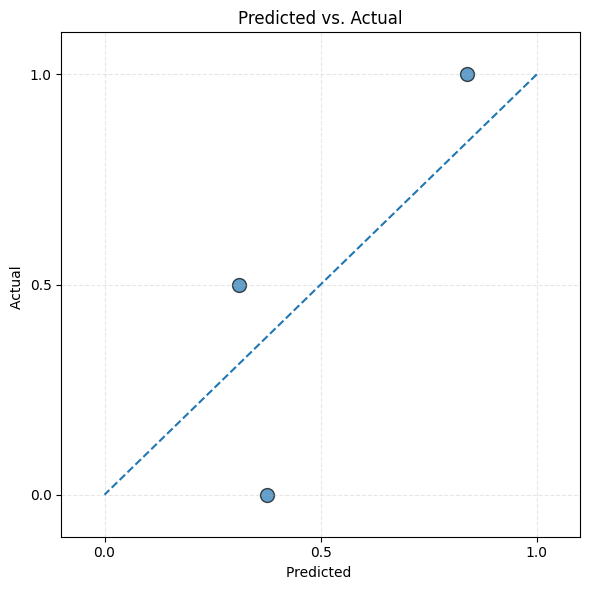

In [141]:
import matplotlib.pyplot as plt

labels = [0.0, 0.5, 1.0]

fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_pred, y_test,
           s=100, alpha=0.7, edgecolor='k', clip_on=False)

ax.plot([1.0, 0.0], [1.0, 0.0], linestyle='--')

ax.set_xticks(labels)
ax.set_yticks(labels)

ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)

ax.set_xlabel('Predicted ')
ax.set_ylabel('Actual ')
ax.set_title(f'Predicted vs. Actual')
ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()
